In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("C:/Users/Chlomaki/Desktop/")


In [2]:
score1 = pd.read_excel("企业评分.xlsx")


In [3]:
score1.index = score1['企业编号']


In [4]:
score1 = score1.drop_duplicates()


In [5]:
part1 = pd.read_excel("part1.xlsx")
part2 = pd.read_excel("part2.xlsx")
part3 = pd.read_excel("part3.xlsx")
part4 = pd.read_excel("part4.xlsx")


In [6]:
part1.index = part1['企业编号']
part2.index = part2['企业编号']
part3.index = part3['企业编号']
part4.index = part4['企业编号']


In [7]:
part1 = part1.drop(['Unnamed: 0', '企业编号'], axis=1)
part2 = part2.drop([0, '企业编号'], axis=1)
part3 = part3.drop(['Unnamed: 0', '企业编号', '企业总评分'], axis=1)
part4 = part4.drop(['企业编号', '企业总评分'], axis=1)


In [8]:
#数据合并
data = score1.merge(part1, left_index=True, right_index=True, how="left")
data = data.merge(part2, left_index=True, right_index=True, how="left")
data = data.merge(part3, left_index=True, right_index=True, how="left")
data = data.merge(part4, left_index=True, right_index=True, how="left")


In [9]:
#data.rename(columns={'资产:货币资金(元)_mean': '货币资金(元)_mean', '资产:固定资产(元)_mean': '固定资产(元)_mean','资产:无形资产(元)_mean': '无形资产(元)_mean', '资产:资产总计(元)_mean': '资产总计(元)_mean', '负债:负债合计(元)_mean': '负债合计(元)_mean'}, inplace=True)
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_\u4e00-\u9fa5]+', '', x))#去掉列名中的非法字符

In [10]:
#划分训练集和测试集
train = data.loc[:3500, :]
test = data.loc[3501:, :]


In [11]:
train = train.dropna().drop_duplicates()
test = test.drop_duplicates()


In [12]:
x_train = train.drop(['企业总评分'], axis=1)
y_train = train['企业总评分']


In [13]:
x_train = x_train.drop(['企业编号'], axis=1)

In [14]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn import linear_model
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
E:\anaconda\envs\pytorch\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [15]:
#lgb模型基础参数，下面开始进行lgb模型的参数调整，xgb模型和gbdt模型参数的调整在代码末尾
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',

    'learning_rate': 0.1,
    'num_leaves': 50,
    'max_depth': 6,    'subsample': 0.8,
    'colsample_bytree': 0.8,
}


In [16]:
#先查找best n_estimators
data_train = lgb.Dataset(x_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])


E:\anaconda\envs\pytorch\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
E:\anaconda\envs\pytorch\lib\site-packages\lightgbm\basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19413
[LightGBM] [Info] Number of data points in the train set: 1736, number of used features: 239
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19413
[LightGBM] [Info] Number of data points in the train set: 1736, number of used features: 239
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19413
[LightGBM] [Info] Number of data points in the train set: 1736, number of used features: 239
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008093 seconds.
You can set `f

E:\anaconda\envs\pytorch\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	cv_agg's rmse: 3.10388 + 0.209258
best n_estimators: 43
best cv score: 3.1024346724060607


In [17]:
#查找最佳max_depth和num_leaves
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.1, n_estimators=43, max_depth=6,metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)
params_test1={'max_depth': range(3,8,1), 'num_leaves':range(20, 170, 10)}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)

In [18]:
gsearch1.fit(x_train, y_train)
gsearch1.best_estimator_,gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 75 candidates, totalling 375 fits


(LGBMRegressor(bagging_fraction=0.8, feature_fraction=0.8, max_depth=4,
               metric='rmse', n_estimators=43, num_leaves=20,
               objective='regression'),
 {'max_depth': 4, 'num_leaves': 20},
 -9.870462764226602)

In [19]:
#max_depth和num_leaves
params_test2={
    'max_depth': [2,3,4],
    'num_leaves':[14,16,18,20,22,24,26]
}
 
gsearch2 = GridSearchCV(estimator=model_lgb, param_grid=params_test2, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch2.fit(x_train, y_train)
gsearch2.best_estimator_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 21 candidates, totalling 105 fits


(LGBMRegressor(bagging_fraction=0.8, feature_fraction=0.8, max_depth=4,
               metric='rmse', n_estimators=43, num_leaves=16,
               objective='regression'),
 {'max_depth': 4, 'num_leaves': 16},
 -9.870462764226602)

In [20]:
#min_data_in_leaf 和 min_sum_hessian_in_leaf
params_test3={
    'min_child_samples': [18, 19, 20, 21, 22],
    'min_child_weight':[0.001, 0.002, 0.003]
}
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=16,
                              learning_rate=0.1, n_estimators=43, max_depth=4, 
                              metric='rmse', bagging_fraction = 0.8, feature_fraction = 0.8)
gsearch3 = GridSearchCV(estimator=model_lgb, param_grid=params_test3, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch3.fit(x_train, y_train)
gsearch3.cv_results_['mean_test_score'], gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


(array([-10.01020204, -10.01020204, -10.01020204,  -9.96764198,
         -9.96764198,  -9.96764198,  -9.87046276,  -9.87046276,
         -9.87046276,  -9.89432699,  -9.89432699,  -9.89432699,
        -10.01397173, -10.01397173, -10.01397173]),
 {'min_child_samples': 20, 'min_child_weight': 0.001},
 -9.870462764226602)

In [21]:
#feature_fraction 和 bagging_fraction
params_test4={
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=16,
                              learning_rate=0.1, n_estimators=43, max_depth=4, 
                              metric='rmse', min_child_samples=20)
gsearch4 = GridSearchCV(estimator=model_lgb, param_grid=params_test4, 
scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch4.fit(x_train, y_train)
gsearch4.cv_results_['mean_test_score'], gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


(array([-9.97552211, -9.96017585, -9.93908852, -9.87046276, -9.96339787,
        -9.97552211, -9.96017585, -9.93908852, -9.87046276, -9.96339787,
        -9.97552211, -9.96017585, -9.93908852, -9.87046276, -9.96339787,
        -9.97552211, -9.96017585, -9.93908852, -9.87046276, -9.96339787,
        -9.97552211, -9.96017585, -9.93908852, -9.87046276, -9.96339787]),
 {'bagging_fraction': 0.6, 'feature_fraction': 0.8},
 -9.870462764226602)

In [22]:
#继续调整
params_test5={
    'feature_fraction': [0.76,0.78,0.8,0.82,0.84],
    'bagging_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
}
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=16,
                              learning_rate=0.1, n_estimators=43, max_depth=4, 
                              metric='rmse', min_child_samples=20)
gsearch5 = GridSearchCV(estimator=model_lgb, param_grid=params_test5, 
scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch5.fit(x_train, y_train)
gsearch5.cv_results_['mean_test_score'],gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 35 candidates, totalling 175 fits


(array([-10.02033105,  -9.95028496,  -9.87046276,  -9.93963103,
         -9.97124257, -10.02033105,  -9.95028496,  -9.87046276,
         -9.93963103,  -9.97124257, -10.02033105,  -9.95028496,
         -9.87046276,  -9.93963103,  -9.97124257, -10.02033105,
         -9.95028496,  -9.87046276,  -9.93963103,  -9.97124257,
        -10.02033105,  -9.95028496,  -9.87046276,  -9.93963103,
         -9.97124257, -10.02033105,  -9.95028496,  -9.87046276,
         -9.93963103,  -9.97124257, -10.02033105,  -9.95028496,
         -9.87046276,  -9.93963103,  -9.97124257]),
 {'bagging_fraction': 0.1, 'feature_fraction': 0.8},
 -9.870462764226602)

In [23]:
#正则化参数
params_test6={
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=16,
                              learning_rate=0.1, n_estimators=43, max_depth=4, 
                              metric='rmse',  min_child_samples=20, feature_fraction=0.8)
gsearch6 = GridSearchCV(estimator=model_lgb, param_grid=params_test6, 
scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch6.fit(x_train, y_train)
gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


({'reg_alpha': 0, 'reg_lambda': 0}, -9.870462764226602)

In [24]:
#将最优参数代回模型
params = {
    'boosting_type': 'gbdt', 
    'objective': 'regression', 
 
    'learning_rate': 0.01, 
    'num_leaves': 16, 
    'max_depth': 4,    
    'min_data_in_leaf': 20,
    'subsample': 1, 
    'colsample_bytree': 0.7,
    'feature_fraction': 0.8,
    'reg_alpha': 0, 
    'reg_lambda': 0,
    'n_estimators': 1291
    }
 
data_train = lgb.Dataset(x_train, y_train, silent=True)
cv_results = lgb.cv(params, data_train, num_boost_round=10000, nfold=5, 
        stratified=False, shuffle=True, metrics='rmse',
        early_stopping_rounds=50, verbose_eval=100, show_stdv=True)
 
print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19413
[LightGBM] [Info] Number of data points in the train set: 1736, number of used features: 239
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19413
[LightGBM] [Info] Number of data points in the train set: 1736, number of used features: 239
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[

In [32]:
#GBDT
def build_model_gbdt(x_train,y_train):
    estimator =GradientBoostingRegressor(n_estimators=525,learning_rate=0.01,min_samples_split=180,min_samples_leaf=20,max_depth=14,max_features=33,subsample=0.84,random_state=10)

    param_grid = {
        'learning_rate': [0.01,0.05,0.08,0.1,0.2],
    }

    gbdt = GridSearchCV(estimator, param_grid,cv=3)

    gbdt.fit(x_train,y_train)

    print(gbdt.best_params_)

    #print(gbdt.best_estimator_ )

    return gbdt

In [33]:
#xgboost
def build_model_xgb(x_train,y_train):
    params = {'learning_rate': 0.01, 'n_estimators': 700, 'max_depth': 4, 'min_child_weight': 3, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'eval_metric':'rmse'} #最优参数
    model = xgb.XGBRegressor(**params) #, objective ='reg:squarederror'

    model.fit(x_train, y_train)

    return model

In [34]:
#lightGBM
def build_model_lgb(x_train,y_train):
    params = {
        'learning_rate': [0.005, 0.01, 0.05, 0.1],
    }
 
    #data_train = lgb.Dataset(x_train, y_train, silent=True)
    model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=16,
                              learning_rate=0.1, n_estimators=1291, max_depth=4, 
                              metric='rmse',  min_child_samples=20, feature_fraction=0.8)
    gbm = GridSearchCV(estimator=model_lgb, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
    gbm.fit(x_train, y_train)
    return gbm

In [35]:
#LinearRegression
def build_model_lr(x_train,y_train):

    reg_model = linear_model.LinearRegression()

    reg_model.fit(x_train,y_train)

    return reg_model

In [36]:
X_data = x_train
Y_data = y_train
X_test = test.drop(['企业编号','企业总评分'], axis=1)

In [37]:
X_test = X_test.dropna().drop_duplicates()

In [38]:
#集成学习
#训练模型
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)
#x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0)
model_gbdt = build_model_gbdt(x_train,y_train)
val_gbdt = model_gbdt.predict(x_val)
subA_gbdt = model_gbdt.predict(X_test)

model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
subA_xgb = model_xgb.predict(X_test)

model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
subA_lgb = model_lgb.predict(X_test)

{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [39]:
#第一层
#线性回归作为次级学习器
train_lgb_pred = model_lgb.predict(x_train)
train_xgb_pred = model_xgb.predict(x_train)
train_gbdt_pred = model_gbdt.predict(x_train)
Stack_X_train = pd.DataFrame()
Stack_X_train['Method_1'] = train_lgb_pred
Stack_X_train['Method_2'] = train_xgb_pred
Stack_X_train['Method_3'] = train_gbdt_pred
Stack_X_val = pd.DataFrame()
Stack_X_val['Method_1'] = val_lgb
Stack_X_val['Method_2'] = val_xgb
Stack_X_val['Method_3'] = val_gbdt
Stack_X_test = pd.DataFrame()
Stack_X_test['Method_1'] = subA_lgb
Stack_X_test['Method_2'] = subA_xgb
Stack_X_test['Method_3'] = subA_gbdt

In [40]:
#第二层
model_lr_Stacking = build_model_lr(Stack_X_train,y_train)
#训练集
train_pre_Stacking = model_lr_Stacking.predict(Stack_X_train)
print('MSE of Stacking-LR:',mean_squared_error(y_train,train_pre_Stacking))
#验证集
val_pre_Stacking = model_lr_Stacking.predict(Stack_X_val)
print('MSE of Stacking-LR:',mean_squared_error(y_val,val_pre_Stacking))
#预测集
subA_Stacking = model_lr_Stacking.predict(Stack_X_test)
#单模型结果
print('MSE of gbdt:',mean_squared_error(y_train,train_gbdt_pred))
print('MSE of gbdt:',mean_squared_error(y_val,val_gbdt))
print('MSE of lgb:',mean_squared_error(y_train,train_lgb_pred))
print('MSE of lgb:',mean_squared_error(y_val,val_lgb))
print('MSE of xgb:',mean_squared_error(y_train,train_xgb_pred))
print('MSE of xgb:',mean_squared_error(y_val,val_xgb))

MSE of Stacking-LR: 3.2537121371269873
MSE of Stacking-LR: 10.211730227859972
MSE of gbdt: 5.288925989026012
MSE of gbdt: 9.515464978700638
MSE of lgb: 4.859561670443698
MSE of lgb: 9.413751447957848
MSE of xgb: 3.961975343570986
MSE of xgb: 9.47972714188597


In [41]:
def train(x_train,y_train,x_val,y_val,X_test):
    #训练模型
    #x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)
    #x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0)
    model_gbdt = build_model_gbdt(x_train,y_train)
    val_gbdt = model_gbdt.predict(x_val)
    subA_gbdt = model_gbdt.predict(X_test)

    model_xgb = build_model_xgb(x_train,y_train)
    val_xgb = model_xgb.predict(x_val)
    subA_xgb = model_xgb.predict(X_test)

    model_lgb = build_model_lgb(x_train,y_train)
    val_lgb = model_lgb.predict(x_val)
    subA_lgb = model_lgb.predict(X_test)

    #第一层
    #线性回归作为次级学习器
    train_lgb_pred = model_lgb.predict(x_train)
    train_xgb_pred = model_xgb.predict(x_train)
    train_gbdt_pred = model_gbdt.predict(x_train)
    Stack_X_train = pd.DataFrame()
    Stack_X_train['Method_1'] = train_lgb_pred
    Stack_X_train['Method_2'] = train_xgb_pred
    Stack_X_train['Method_3'] = train_gbdt_pred
    Stack_X_val = pd.DataFrame()
    Stack_X_val['Method_1'] = val_lgb
    Stack_X_val['Method_2'] = val_xgb
    Stack_X_val['Method_3'] = val_gbdt
    Stack_X_test = pd.DataFrame()
    Stack_X_test['Method_1'] = subA_lgb
    Stack_X_test['Method_2'] = subA_xgb
    Stack_X_test['Method_3'] = subA_gbdt

    #第二层
    model_lr_Stacking = build_model_lr(Stack_X_train,y_train)
    #训练集
    train_pre_Stacking = model_lr_Stacking.predict(Stack_X_train)
    print('MSE of Stacking-LR:',mean_squared_error(y_train,train_pre_Stacking))
    #验证集
    val_pre_Stacking = model_lr_Stacking.predict(Stack_X_val)
    print('MSE of Stacking-LR:',mean_squared_error(y_val,val_pre_Stacking))
    #预测集
    subA_Stacking = model_lr_Stacking.predict(Stack_X_test)
    #单模型结果
    print('MSE of gbdt:',mean_squared_error(y_train,train_gbdt_pred))
    print('MSE of gbdt:',mean_squared_error(y_val,val_gbdt))
    print('MSE of lgb:',mean_squared_error(y_train,train_lgb_pred))
    print('MSE of lgb:',mean_squared_error(y_val,val_lgb))
    print('MSE of xgb:',mean_squared_error(y_train,train_xgb_pred))
    print('MSE of xgb:',mean_squared_error(y_val,val_xgb))
    MSE_lr_train = mean_squared_error(y_train,train_pre_Stacking)
    MSE_lr_val = mean_squared_error(y_val,val_pre_Stacking)
    MSE_gbdt_train = mean_squared_error(y_train,train_gbdt_pred)
    MSE_gbdt_val = mean_squared_error(y_val,val_gbdt)
    MSE_lgb_train = mean_squared_error(y_train,train_lgb_pred)
    MSE_lgb_val = mean_squared_error(y_val,val_lgb)
    MSE_xgb_train = mean_squared_error(y_train,train_xgb_pred)
    MSE_xgb_val = mean_squared_error(y_val,val_xgb)
    temp = pd.Series([MSE_lr_train,MSE_lr_val,MSE_gbdt_train,MSE_gbdt_val,MSE_lgb_train,MSE_lgb_val,MSE_xgb_train,MSE_xgb_val])
    #print(temp)
    return temp

In [66]:
from sklearn.model_selection import KFold
MSE_of_train = pd.DataFrame(columns={0,1,2,3})
MSE_of_val = pd.DataFrame(columns={0,1,2,3})
folds = KFold(n_splits=5, shuffle=True, random_state=123)
i = 0
for fold_i, (train_index, val_index) in enumerate(folds.split(X_data)):
    x_train = X_data.iloc[train_index]
    x_val = X_data.iloc[val_index]
    y_train = Y_data.iloc[train_index]
    y_val = Y_data.iloc[val_index]
    #MSE_lr_train,MSE_lr_val,MSE_gbdt_train,MSE_gbdt_val,MSE_lgb_train,MSE_lgb_val,MSE_xgb_train,MSE_xgb_val = train(x_train,y_train,x_val,y_val,X_test)
    result = train(x_train,y_train,x_val,y_val,X_test)
    MSE_of_train.loc[i] = [result[0],result[2],result[4],result[6]]
    MSE_of_val.loc[i] = [result[1],result[3],result[5],result[7]]
    #MSE_of_train.append(MSE_lr_train, MSE_gbdt_train, MSE_lgb_train, MSE_xgb_train)
    i = i + 1
MSE_of_train.columns = ["lr","gbdt","lgb","xgb"]
MSE_of_val.columns = ["lr","gbdt","lgb","xgb"]
#print(MSE_of_train['lr'].sum()/5,MSE_of_train['gbdt'].sum()/5,MSE_of_train['lgb'].sum()/5,MSE_of_train['xgb'].sum()/5)
#print(MSE_of_val['lr'].sum()/5,MSE_of_val['gbdt'].sum()/5,MSE_of_val['lgb'].sum()/5,MSE_of_val['xgb'].sum()/5)

{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
MSE of Stacking-LR: 3.681049398361151
MSE of Stacking-LR: 11.447452532104913
MSE of gbdt: 5.114587685423902
MSE of gbdt: 10.74951480690097
MSE of lgb: 4.778251344235547
MSE of lgb: 10.877536688766336
MSE of xgb: 4.0982373058550685
MSE of xgb: 10.847235541305952
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
MSE of Stacking-LR: 3.6532555169746135
MSE of Stacking-LR: 9.774943623200741
MSE of gbdt: 5.16997531558126
MSE of gbdt: 9.83005325791016
MSE of lgb: 5.0293090333274275
MSE of lgb: 9.72540609758993
MSE of xgb: 4.258256300704084
MSE of xgb: 9.523721836882814
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
MSE of Stacking-LR: 3.7845702050053984
MSE of Stacking-LR: 10.364315639457207
MSE of gbdt: 5.290771547932909
MSE of gbdt: 8.809772760681906
MSE of lgb: 5.044626531421143
MSE of lgb: 8.830973660264709
MSE of xgb: 4.292314419547885
MSE of xgb: 9.24629404728261
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
MSE of Stacking-LR: 3.7408039631091468
MSE of Stacking-LR: 9.526460435221823
MSE of gbdt: 5.282558101296438
MSE of gbdt: 8.979933143782121
MSE of lgb: 5.074297595985532
MSE of lgb: 8.762023320112212
MSE of xgb: 4.325177438613633
MSE of xgb: 8.771869080089536
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
MSE of Stacking-LR: 3.7581529914241574
MSE of Stacking-LR: 10.011001996111784
MSE of gbdt: 5.353702168234889
MSE of gbdt: 8.816033416887768
MSE of lgb: 5.063812574398623
MSE of lgb: 9.021265984693162
MSE of xgb: 4.2894322387464925
MSE of xgb: 9.111547398802019
3.7235664149748935 5.242318963693879 4.998059415873655 4.2526835406934325
10.224834845219295 9.437061477232586 9.44344115028527 9.500133580872586


In [122]:
#各模型的总体表现，MSE取均值
print("MSE of train set:")
print("Stacking-LR:", MSE_of_train['lr'].sum()/5, "gbdt:", MSE_of_train['gbdt'].sum()/5, "lgb:", MSE_of_train['lgb'].sum()/5, "xgb:", MSE_of_train['xgb'].sum()/5)
print("MSE of validation set:")
print("Stacking-LR:", MSE_of_val['lr'].sum()/5, "gbdt:", MSE_of_val['gbdt'].sum()/5, "lgb:", MSE_of_val['lgb'].sum()/5, "xgb:", MSE_of_val['xgb'].sum()/5)

MSE of train set:
Stacking-LR: 3.7235664149748935 gbdt: 5.242318963693879 lgb: 4.998059415873655 xgb: 4.2526835406934325
MSE of validation set:
Stacking-LR: 10.224834845219295 gbdt: 9.437061477232586 lgb: 9.44344115028527 xgb: 9.500133580872586


In [69]:
X_test_final = test.drop(['企业编号','企业总评分'], axis=1)

In [71]:
#使用lgb模型预测测试集结果
y_temp = model_lgb.predict(X_test_final)

In [77]:
#将预测结果四舍六入五留双化为整数
from decimal import *
x=0
y_final = y_temp
for i in y_temp:
    y_final[x] = Decimal(i).quantize(Decimal('0'),rounding=ROUND_HALF_UP)
    x=x+1
#y_final = Decimal(y_temp).quantize(Decimal('0.00'),rounding=ROUND_HALF_UP)

In [81]:
#构造结果集
rs = pd.DataFrame(test['企业编号'], index=test.index)

In [83]:
rs['评分'] = y_final

In [85]:
#结果输出
rs.to_excel('企业评分-测试集final.xlsx')

In [88]:
#查看lgb模型训练得到的特征重要性排名
lgb_params = {'objective':'regression',
            'num_leaves':16,
            'learning_rate':0.01, 
            'n_estimators':1291, 
            'max_depth':4, 
            'metric':'rmse',  
            'min_child_samples':20, 
            'feature_fraction':0.8,}
model = lgb.train(lgb_params, data_train)

E:\anaconda\envs\pytorch\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19413
[LightGBM] [Info] Number of data points in the train set: 2173, number of used features: 239
[LightGBM] [Info] Start training from score 83.632597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [111]:
import matplotlib
matplotlib.use('nbagg')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#plt.figure(dpi=600, figsize=(12,6))
plt.rcParams['figure.figsize'] = (12.0, 80.0)
plt.rcParams['figure.dpi'] = 600
lgb.plot_importance(model, max_num_features=400)
plt.title("Featurertances")
#plt.show() #特征重要性画图

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Featurertances')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Featurertances')

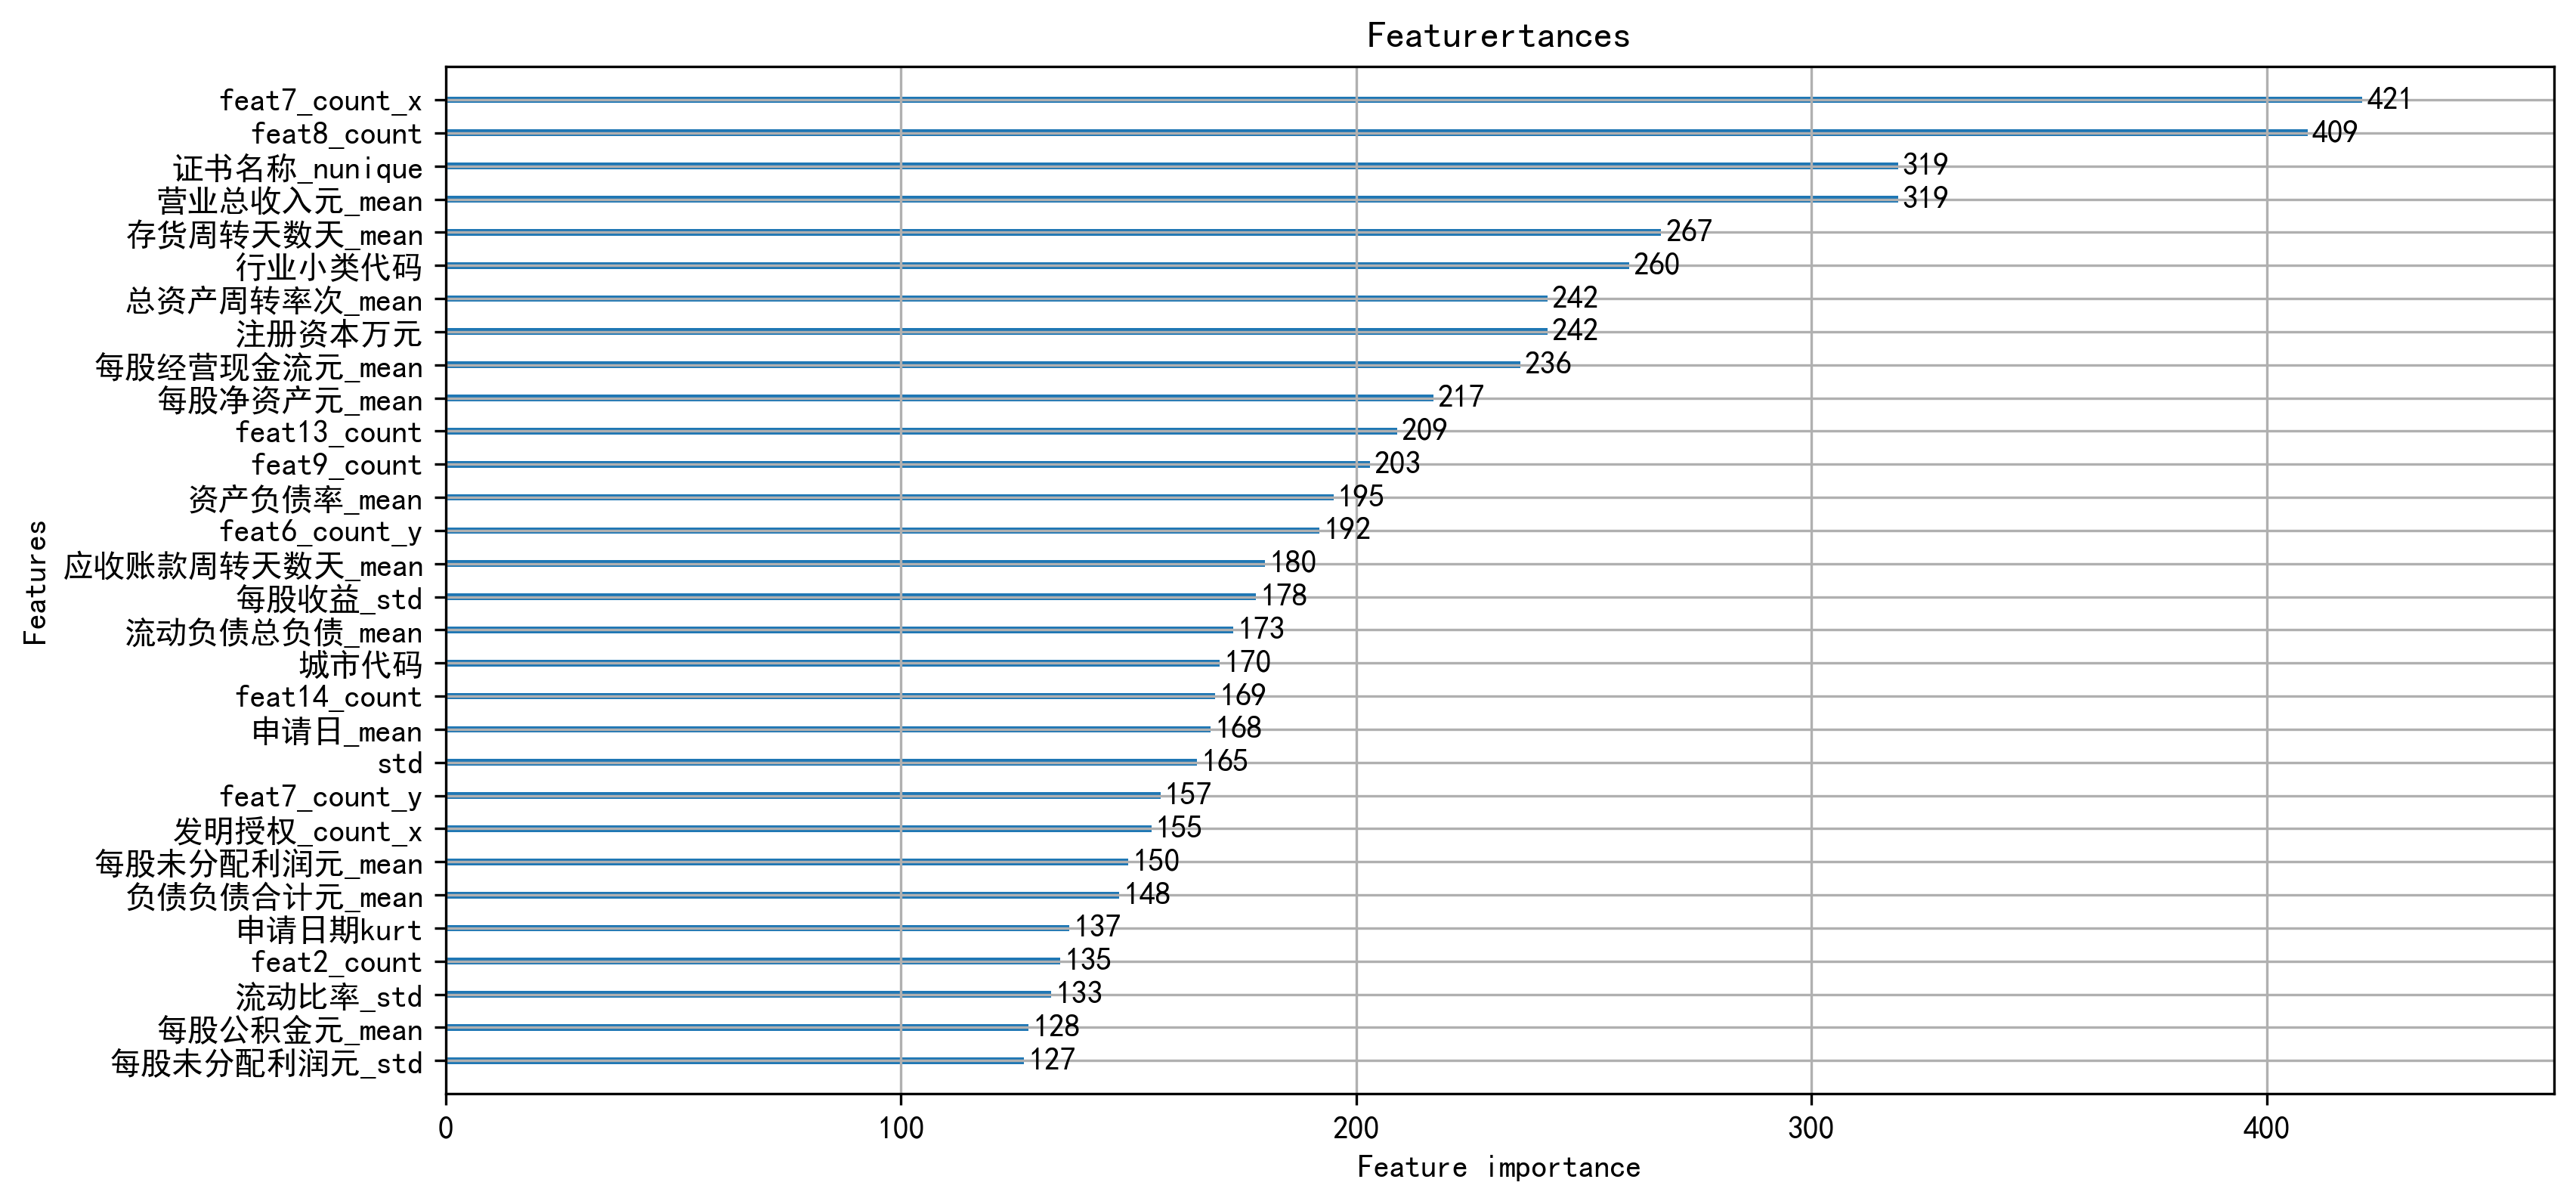

In [119]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['figure.dpi'] = 300
lgb.plot_importance(model, max_num_features=30)
plt.title("Featurertances") #重要性前30画图

Fitting estimator with 439 features.
Fitting estimator with 396 features.
Fitting estimator with 353 features.
Fitting estimator with 310 features.
Fitting estimator with 267 features.


<IPython.core.display.Javascript object>

E:\anaconda\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


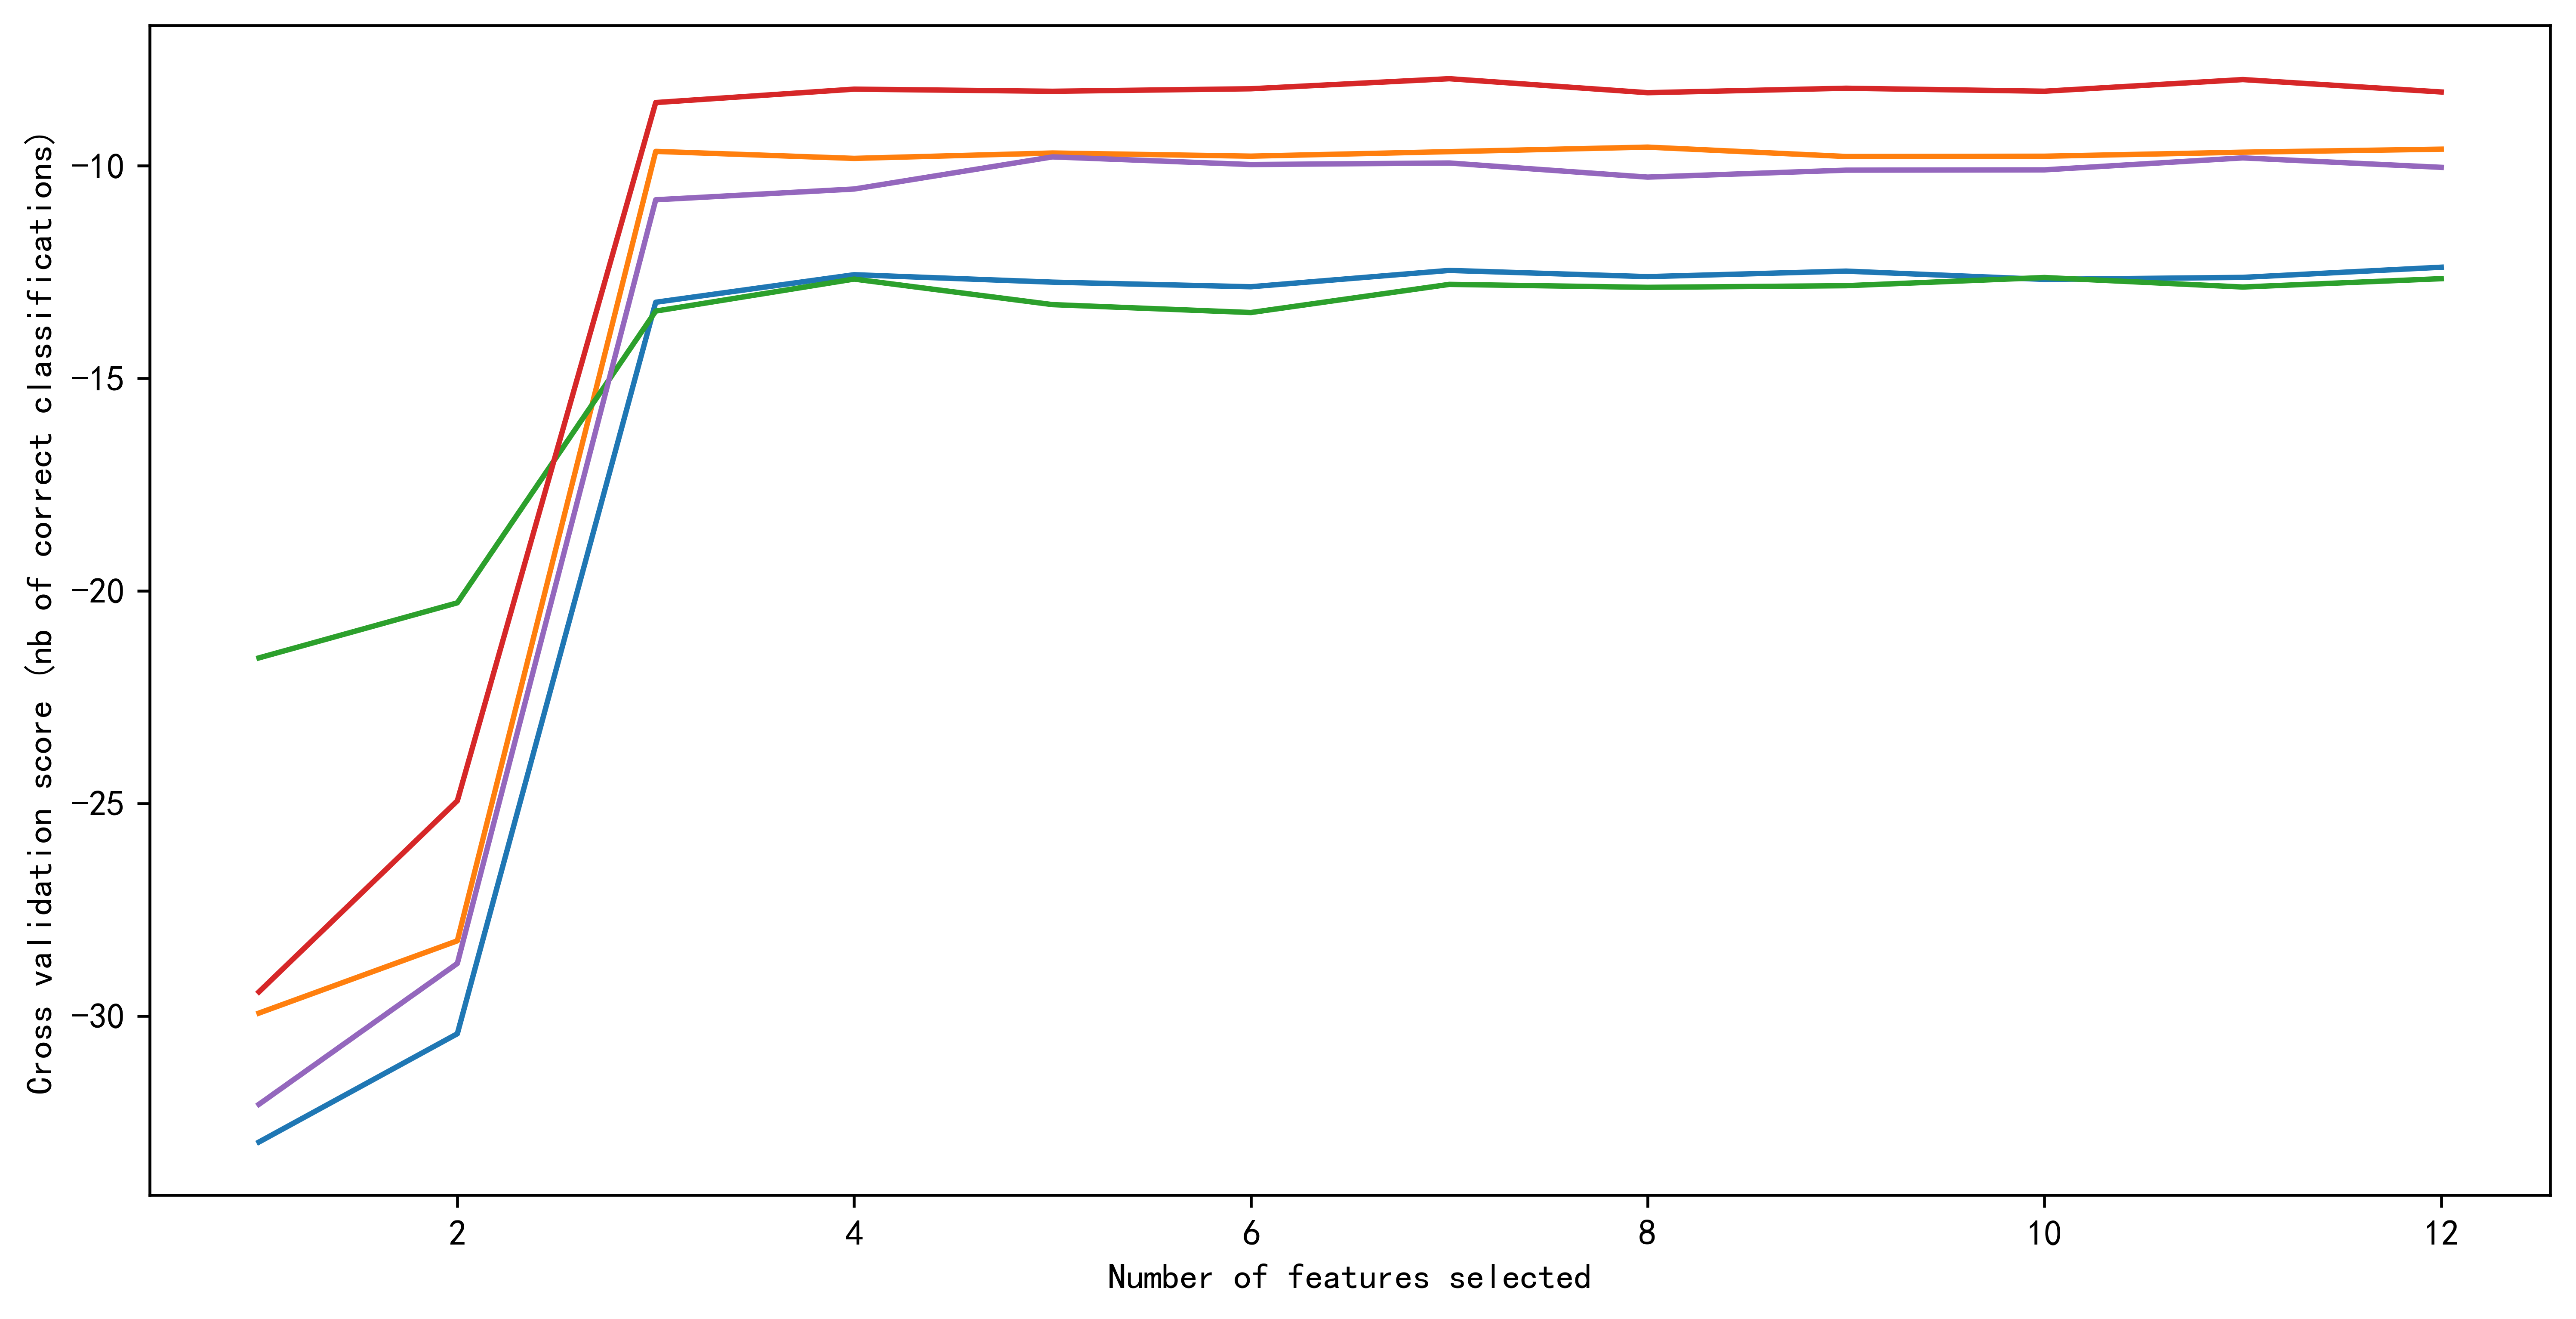

In [117]:
#RFECV进行特征选择
from sklearn.feature_selection import RFECV
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=16,
                              learning_rate=0.1, n_estimators=1291, max_depth=4, 
                              metric='rmse',  min_child_samples=20, feature_fraction=0.8)
rfecv=RFECV(
	estimator=model_lgb, 
	step=0.1,
	min_features_to_select=1, 
	cv=5,
	scoring='neg_mean_squared_error', 
	verbose=1, 
	n_jobs=4, 
	importance_getter='auto'
	)
rfecv.fit(X_data,Y_data)
plt.figure()
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['figure.dpi'] = 60
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [57]:
#尝试
folds = KFold(n_splits=5, shuffle=True, random_state=123)
i = 0
x_train_gbdt = pd.DataFrame()
x_train_lgb = pd.DataFrame()
x_train_xgb = pd.DataFrame()
x_val_gbdt = pd.DataFrame()
x_val_lgb = pd.DataFrame()
x_val_xgb = pd.DataFrame()
x_sub_gbdt = pd.DataFrame()
x_sub_lgb = pd.DataFrame()
x_sub_xgb = pd.DataFrame()
X_data1 = X_data.iloc[:2170,]
Y_data1 = Y_data.iloc[:2170,]
for fold_i, (train_index, val_index) in enumerate(folds.split(X_data1)):
    x_train = X_data1.iloc[train_index]
    x_val = X_data1.iloc[val_index]
    y_train = Y_data1.iloc[train_index]
    y_val = Y_data1.iloc[val_index]
    #训练模型
    #x_train,x_val,y_train,y_val = train_test_split(X_data1,Y_data1,test_size=0.3)
    #x_train,x_val,y_train,y_val = train_test_split(X_data1,Y_data1,test_size=0)
    model_gbdt = build_model_gbdt(x_train,y_train)
    val_gbdt = model_gbdt.predict(x_val)
    subA_gbdt = model_gbdt.predict(X_test)

    model_xgb = build_model_xgb(x_train,y_train)
    val_xgb = model_xgb.predict(x_val)
    subA_xgb = model_xgb.predict(X_test)

    model_lgb = build_model_lgb(x_train,y_train)
    val_lgb = model_lgb.predict(x_val)
    subA_lgb = model_lgb.predict(X_test)

    #第一层
    #线性回归作为次级学习器
    train_lgb_pred = model_lgb.predict(x_train)
    train_xgb_pred = model_xgb.predict(x_train)
    train_gbdt_pred = model_gbdt.predict(x_train)
    x_train_gbdt[i] = train_lgb_pred
    x_train_lgb[i] = train_lgb_pred
    x_train_xgb[i] = train_xgb_pred
    x_val_gbdt[i] = val_gbdt
    x_val_lgb[i] = val_lgb
    x_val_xgb[i] = val_xgb
    x_sub_gbdt[i] = subA_gbdt
    x_sub_lgb[i] = subA_lgb
    x_sub_xgb[i] = subA_xgb
    i = i+1

{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
{'learning_rate': 0.01}


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [59]:
#x_train_gbdt.mean(axis=1)
Stack_X_train = pd.DataFrame()
Stack_X_train['Method_1'] = x_train_lgb.mean(axis=1)
Stack_X_train['Method_2'] = x_train_xgb.mean(axis=1)
Stack_X_train['Method_3'] = x_train_gbdt.mean(axis=1)
Stack_X_val = pd.DataFrame()
Stack_X_val['Method_1'] = x_val_lgb.mean(axis=1)
Stack_X_val['Method_2'] = x_val_xgb.mean(axis=1)
Stack_X_val['Method_3'] = x_val_gbdt.mean(axis=1)
Stack_X_test = pd.DataFrame()
Stack_X_test['Method_1'] = x_sub_lgb.mean(axis=1)
Stack_X_test['Method_2'] = x_sub_xgb.mean(axis=1)
Stack_X_test['Method_3'] = x_sub_gbdt.mean(axis=1)

In [63]:
#第二层
model_lr_Stacking = build_model_lr(Stack_X_train,y_train)
#训练集
train_pre_Stacking = model_lr_Stacking.predict(Stack_X_train)
print('MSE of Stacking-LR:',mean_squared_error(y_train,train_pre_Stacking))
#验证集
val_pre_Stacking = model_lr_Stacking.predict(Stack_X_val)
print('MSE of Stacking-LR:',mean_squared_error(y_val,val_pre_Stacking))
#预测集
subA_Stacking = model_lr_Stacking.predict(Stack_X_test)
#结果并不是很理想，弃用

MSE of Stacking-LR: 19.467068082857967
MSE of Stacking-LR: 21.304794141911998


In [43]:
#xgb调参
cv_params1 = {'n_estimators': [60,80,100,120,140]}
other_params1 = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'eval_metric':'rmse'}
model1 = xgb.XGBRegressor(**other_params1)
optimized_xgb1 = GridSearchCV(estimator=model1, param_grid=cv_params1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_xgb1.fit(X_data, Y_data)
optimized_xgb1.best_params_,optimized_xgb1.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


E:\anaconda\envs\pytorch\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


({'n_estimators': 100}, -10.355026688812206)

In [44]:
cv_params2 = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params2 = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'eval_metric':'rmse'}
model2 = xgb.XGBRegressor(**other_params2)
optimized_xgb2 = GridSearchCV(estimator=model2, param_grid=cv_params2, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_xgb2.fit(X_data, Y_data)
optimized_xgb2.best_params_,optimized_xgb2.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


({'max_depth': 4, 'min_child_weight': 3}, -10.090875656399351)

In [45]:
cv_params3 = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params3 = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 3, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'eval_metric':'rmse'}
model3 = xgb.XGBRegressor(**other_params3)
optimized_xgb3 = GridSearchCV(estimator=model3, param_grid=cv_params3, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_xgb3.fit(X_data, Y_data)
optimized_xgb3.best_params_,optimized_xgb3.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


({'gamma': 0.1}, -10.090875656399351)

In [46]:
cv_params4 = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params4 = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 3, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1, 'eval_metric':'rmse'}
model4 = xgb.XGBRegressor(**other_params4)
optimized_xgb4 = GridSearchCV(estimator=model4, param_grid=cv_params4, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_xgb4.fit(X_data, Y_data)
optimized_xgb4.best_params_,optimized_xgb4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


({'colsample_bytree': 0.8, 'subsample': 0.8}, -10.090875656399351)

In [47]:
cv_params5 = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params5 = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 3, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1, 'eval_metric':'rmse'}
model5 = xgb.XGBRegressor(**other_params5)
optimized_xgb5 = GridSearchCV(estimator=model5, param_grid=cv_params5, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_xgb5.fit(X_data, Y_data)
optimized_xgb5.best_params_,optimized_xgb5.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


({'reg_alpha': 0.1, 'reg_lambda': 0.1}, -9.985976031521039)

In [48]:
cv_params6 = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
other_params6 = {'learning_rate': 0.01, 'n_estimators': 700, 'max_depth': 4, 'min_child_weight': 3, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'eval_metric':'rmse'}
model6 = xgb.XGBRegressor(**other_params6)
optimized_xgb6 = GridSearchCV(estimator=model6, param_grid=cv_params6, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_xgb6.fit(X_data, Y_data)
optimized_xgb6.best_params_,optimized_xgb6.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'learning_rate': 0.01}, -9.812948591276117)

In [49]:
#gbdt调参
param_test1={'n_estimators':[60,65,70,75,80], 'learning_rate':[0.01, 0.05, 0.07, 0.1, 0.2]}
model_gb1=GradientBoostingRegressor(n_estimators=75,learning_rate=0.07,min_samples_split=300,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
optimized_gbdt1=GridSearchCV(estimator=model_gb1,param_grid=param_test1, scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=4)
optimized_gbdt1.fit(X_data, Y_data)
optimized_gbdt1.best_params_,optimized_gbdt1.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


({'learning_rate': 0.07, 'n_estimators': 75}, -10.178104670652417)

In [50]:
param_test2={'max_depth':[12,13,14,15,16], 'min_samples_split':[160,170,180,190,200]}
model_gb2=GradientBoostingRegressor(n_estimators=75,learning_rate=0.07,min_samples_split=300,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
optimized_gbdt2=GridSearchCV(estimator=model_gb2,param_grid=param_test2, scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=4)
optimized_gbdt2.fit(X_data, Y_data)
optimized_gbdt2.best_params_,optimized_gbdt2.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


({'max_depth': 14, 'min_samples_split': 180}, -9.904280856249803)

In [51]:
param_test3={'min_samples_split':[150,160,170,180,190],'min_samples_leaf':[10,20,30]}
model_gb3=GradientBoostingRegressor(n_estimators=75,learning_rate=0.07,min_samples_split=180,min_samples_leaf=20,max_depth=14,max_features='sqrt',subsample=0.8,random_state=10)
optimized_gbdt3=GridSearchCV(estimator=model_gb3,param_grid=param_test3, scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=4)
optimized_gbdt3.fit(X_data, Y_data)
optimized_gbdt3.best_params_,optimized_gbdt3.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


({'min_samples_leaf': 20, 'min_samples_split': 180}, -9.904280856249803)

In [52]:
param_test4={'max_features':range(15,35,1)}  
model_gb4=GradientBoostingRegressor(n_estimators=75,learning_rate=0.07,min_samples_split=180,min_samples_leaf=20,max_depth=14,max_features='sqrt',subsample=0.8,random_state=10)
optimized_gbdt4=GridSearchCV(estimator=model_gb4,param_grid=param_test4, scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=4)
optimized_gbdt4.fit(X_data, Y_data)
optimized_gbdt4.best_params_,optimized_gbdt4.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'max_features': 33}, -9.883976723940956)

In [53]:
param_test5={'subsample':[0.75,0.8,0.85,0.9,0.95]}   
model_gb5=GradientBoostingRegressor(n_estimators=75,learning_rate=0.07,min_samples_split=180,min_samples_leaf=20,max_depth=14,max_features=33,subsample=0.8,random_state=10)
optimized_gbdt5=GridSearchCV(estimator=model_gb5,param_grid=param_test5, scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=4)
optimized_gbdt5.fit(X_data, Y_data)
optimized_gbdt5.best_params_,optimized_gbdt5.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'subsample': 0.9}, -9.79545580711155)

In [54]:
param_test6={'subsample':[0.83,0.84,0.85,0.86,0.87]}   
model_gb6=GradientBoostingRegressor(n_estimators=525,learning_rate=0.01,min_samples_split=180,min_samples_leaf=20,max_depth=14,max_features=33,subsample=0.84,random_state=10)
optimized_gbdt6=GridSearchCV(estimator=model_gb6,param_grid=param_test6, scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=4)
optimized_gbdt6.fit(X_data, Y_data)
optimized_gbdt6.best_params_,optimized_gbdt6.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'subsample': 0.84}, -9.671156561746235)